<a href="https://colab.research.google.com/github/irgishalby/Cafe-Revenue-Optimization/blob/main/Cafe_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Café Transaction Data Analytics Project**

**Dataset Files:**
1. `index_1.csv`
2. `index_2.csv`

# 1. Setup and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a professional visual style for all plots
sns.set_theme(style="whitegrid", palette="viridis")

# Load the datasets
# Assuming the files are uploaded directly to the Colab environment.
try:
    df1 = pd.read_csv('index_1.csv')
    df2 = pd.read_csv('index_2.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: One or both files not found. Please ensure 'index_1.csv' and 'index_2.csv' are uploaded.")
    exit()

Data loaded successfully.


# 2. Data Cleaning and Feature Engineering

2.1 Merge Datasets

In [2]:
# Inspect the columns of both dataframes before concatenation.
print("\n--- df1 Info ---")
df1.info()
print("\n--- df2 Info ---")
df2.info()


--- df1 Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB

--- df2 Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         262 non-null    object 
 1   datetime     262 non-null    object 
 2   cash_type    262 non-null    object 
 3   money        262 non-null    float64
 4   coffee_name  262 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


In [3]:
# We will align the common columns and merge.
common_cols = ['date', 'datetime', 'cash_type', 'money', 'coffee_name']
df = pd.concat([
    df1[common_cols],
    df2[common_cols]
], ignore_index=True)

print("\n--- Combined Data Head ---")
print(df.head())
print("\n--- Combined Data Info ---")
df.info()
print(f"Total rows after merge: {len(df)}")


--- Combined Data Head ---
         date                 datetime cash_type  money    coffee_name
0  2024-03-01  2024-03-01 10:15:50.520      card   38.7          Latte
1  2024-03-01  2024-03-01 12:19:22.539      card   38.7  Hot Chocolate
2  2024-03-01  2024-03-01 12:20:18.089      card   38.7  Hot Chocolate
3  2024-03-01  2024-03-01 13:46:33.006      card   28.9      Americano
4  2024-03-01  2024-03-01 13:48:14.626      card   38.7          Latte

--- Combined Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   money        3898 non-null   float64
 4   coffee_name  3898 non-null   object 
dtypes: float64(1), object(4)
memory usage: 152.4+ KB
Total rows after merge: 3898


2.2 Data Type Conversion and Cleaning

In [4]:
# Rename columns for clarity and convert data types.
df.rename(columns={'cash_type': 'payment_type', 'money': 'revenue', 'coffee_name': 'product'}, inplace=True)

# Convert date/datetime columns to datetime objects
df['date'] = pd.to_datetime(df['date'])

# FIX: Use 'format="mixed"' to handle inconsistencies in the datetime string format (e.g., some have milliseconds, some don't).
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

# FIX for Inconsistent Product Names: Standardize product names to lowercase and strip spaces.
df['product'] = df['product'].str.lower().str.strip()

# Check for and remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"\nTotal rows after dropping duplicates: {len(df)}")

# Check for missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())
# Assuming no critical missing data for this EDA.


Total rows after dropping duplicates: 3896

--- Missing Values Check ---
date            0
datetime        0
payment_type    0
revenue         0
product         0
dtype: int64


2.3. Feature Engineering

In [5]:
# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df['date_only'] = df['date'].dt.date # For daily aggregation

# Map payment_type to a cleaner format
df['payment_type'] = df['payment_type'].str.lower().str.strip()
# Standardize payment types (assuming 'card' and 'cash' are the main types)
df['payment_type'] = df['payment_type'].apply(lambda x: 'Card' if 'card' in x else ('Cash' if 'cash' in x else 'Other'))

print("\n--- Data with New Features Head ---")
print(df.head())


--- Data with New Features Head ---
        date                datetime payment_type  revenue        product  \
0 2024-03-01 2024-03-01 10:15:50.520         Card     38.7          latte   
1 2024-03-01 2024-03-01 12:19:22.539         Card     38.7  hot chocolate   
2 2024-03-01 2024-03-01 12:20:18.089         Card     38.7  hot chocolate   
3 2024-03-01 2024-03-01 13:46:33.006         Card     28.9      americano   
4 2024-03-01 2024-03-01 13:48:14.626         Card     38.7          latte   

   year  month day_of_week  hour   date_only  
0  2024      3      Friday    10  2024-03-01  
1  2024      3      Friday    12  2024-03-01  
2  2024      3      Friday    12  2024-03-01  
3  2024      3      Friday    13  2024-03-01  
4  2024      3      Friday    13  2024-03-01  


# 3. Exploratory Data Analysis (EDA)

3.1 Total Revenue and Average Revenue per Transaction (ARPT)

In [6]:
total_revenue = df['revenue'].sum()
total_transactions = len(df)
average_revenue_per_transaction = total_revenue / total_transactions

print(f"Total Revenue across the period: ${total_revenue:,.2f}")
print(f"Total Number of Transactions: {total_transactions:,}")
print(f"Average Revenue per Transaction (ARPT): ${average_revenue_per_transaction:.2f}")

Total Revenue across the period: $122,271.58
Total Number of Transactions: 3,896
Average Revenue per Transaction (ARPT): $31.38


3.2 Daily and Monthly Revenue Trends

Daily Revenue

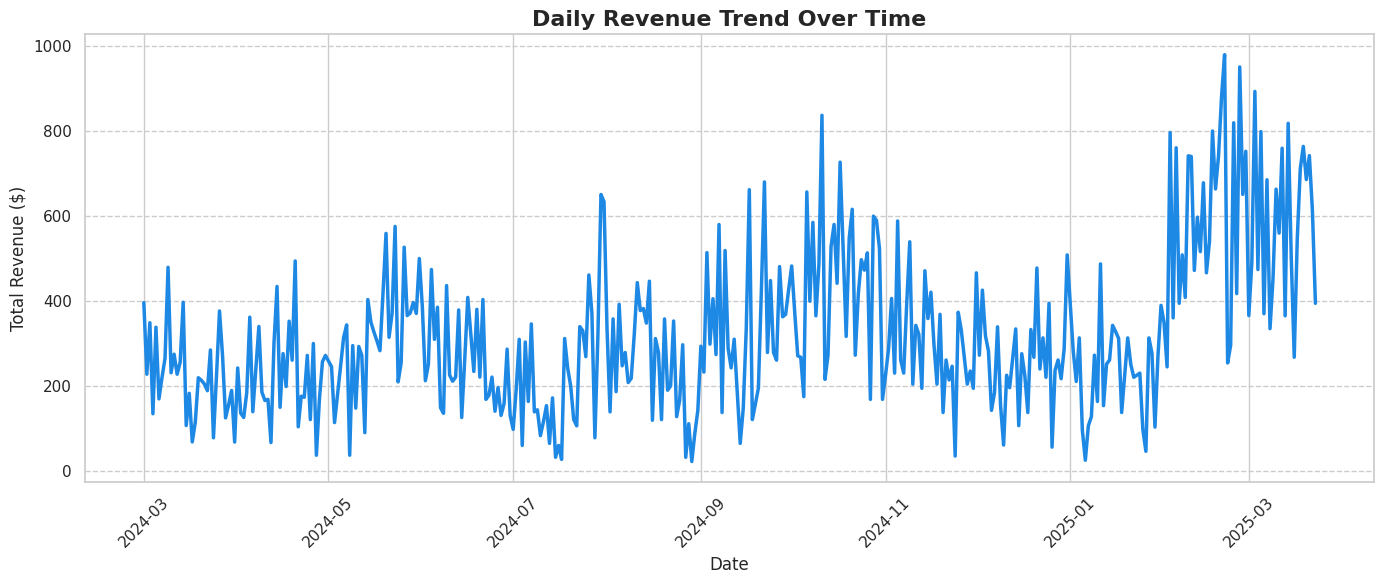

In [7]:
# Aggregate revenue by date
daily_revenue = df.groupby('date_only')['revenue'].sum().reset_index()
daily_revenue['date_only'] = pd.to_datetime(daily_revenue['date_only']) # Convert back for plotting

# Aggregate revenue by month
monthly_revenue = df.groupby(['year', 'month'])['revenue'].sum().reset_index()
monthly_revenue['month_year'] = pd.to_datetime(monthly_revenue['year'].astype(str) + '-' + monthly_revenue['month'].astype(str) + '-01')

# Plotting Daily Revenue
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_revenue, x='date_only', y='revenue', color='#1E88E5', linewidth=2.5)
plt.title('Daily Revenue Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Monthly Revenue

/tmp/ipython-input-2329503725.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in monthly_revenue['month_year']])


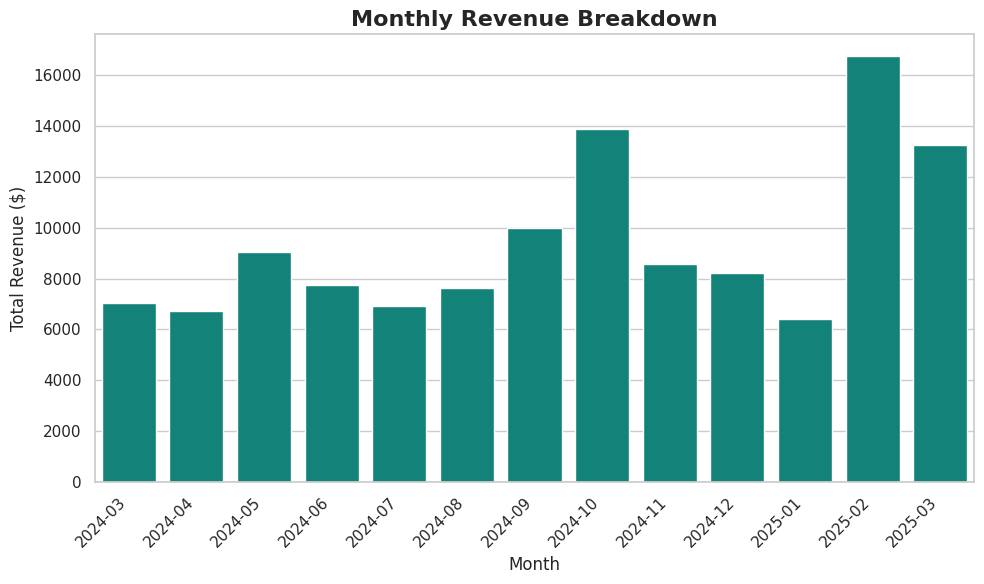

In [8]:
# Plotting Monthly Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_revenue, x='month_year', y='revenue', color='#009688')
plt.title('Monthly Revenue Breakdown', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Reformat x-axis labels to display Month-Year
plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in monthly_revenue['month_year']])
plt.tight_layout()
plt.show()

3.3 Best-Selling Coffee Products (Top 10)

/tmp/ipython-input-1899270272.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_volume, x='transaction_count', y='product', palette='BuPu_r')


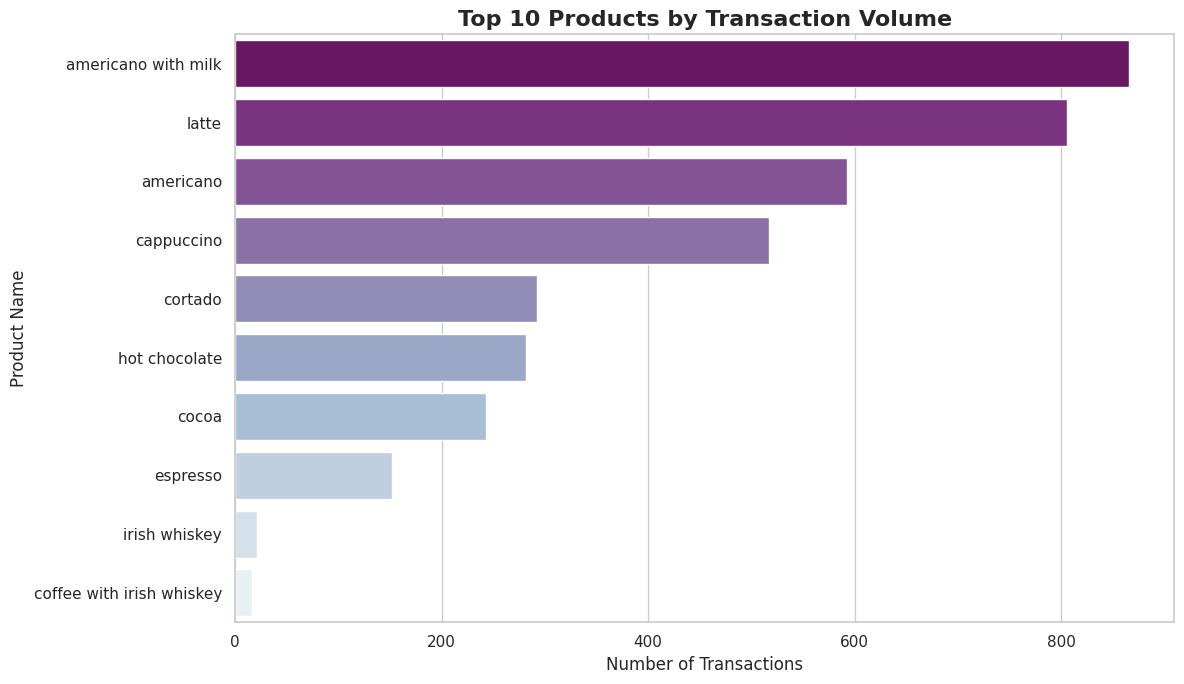

In [21]:
# Calculate transaction count and total revenue per product
product_sales = df.groupby('product').agg(
    transaction_count=('product', 'size'),
    total_revenue=('revenue', 'sum')
).reset_index()

# Sort by Transaction Count (Volume)
top_10_volume = product_sales.sort_values(by='transaction_count', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_volume, x='transaction_count', y='product', palette='BuPu_r')
plt.title('Top 10 Products by Transaction Volume', fontsize=16, fontweight='bold')
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

3.4 Cash vs. Card Payment Breakdown

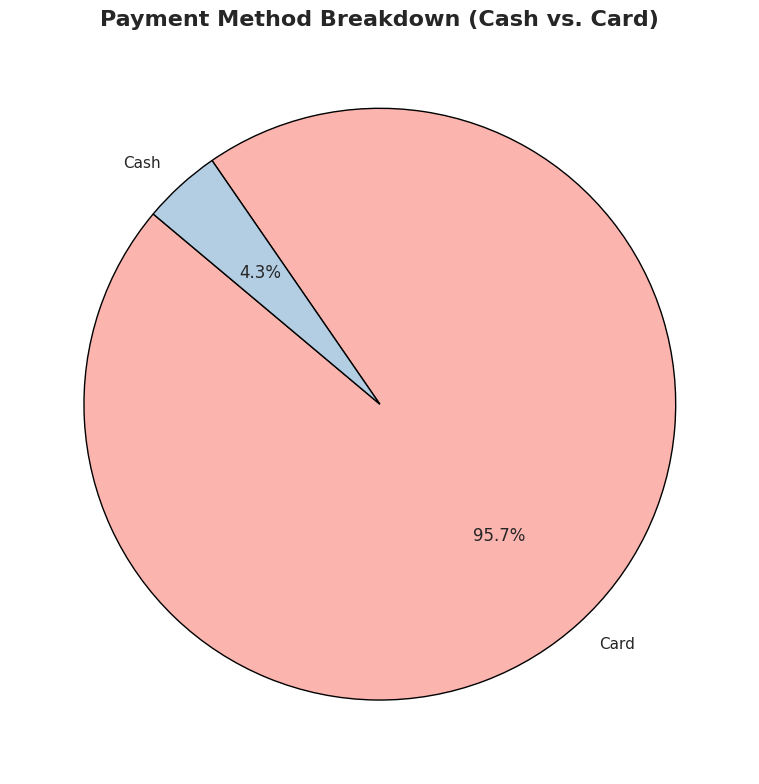

In [10]:
payment_breakdown = df['payment_type'].value_counts(normalize=True).mul(100).round(2).reset_index()
payment_breakdown.columns = ['Payment Type', 'Percentage']

# Plotting the breakdown
plt.figure(figsize=(8, 8))
plt.pie(
    payment_breakdown['Percentage'],
    labels=payment_breakdown['Payment Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Pastel1'),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Payment Method Breakdown (Cash vs. Card)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

3.5 Peak Sales Hours and Days

Hours

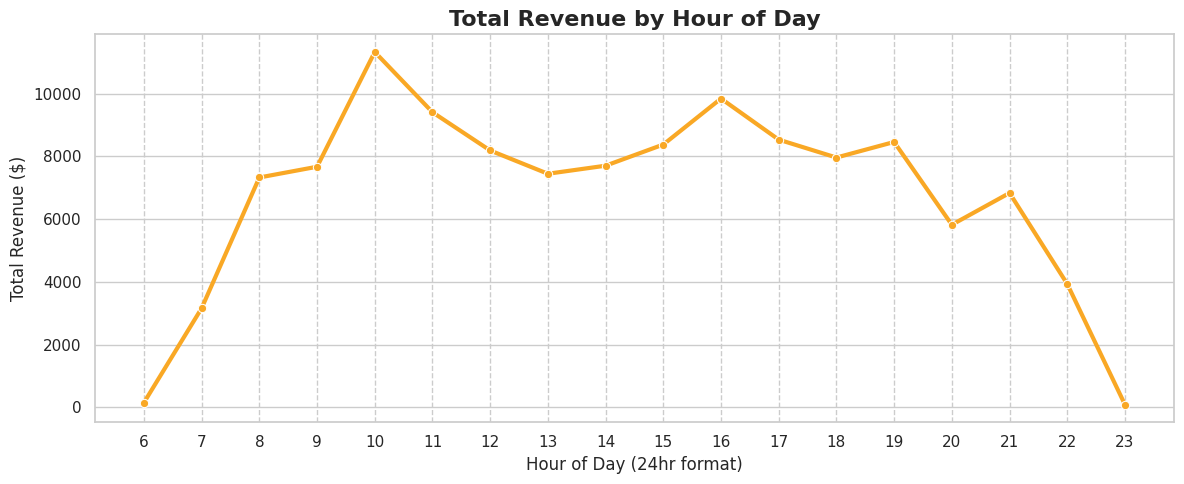

In [11]:
# Peak Sales Hours
hourly_sales = df.groupby('hour')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_sales, x='hour', y='revenue', marker='o', color='#F9A825', linewidth=3)
plt.title('Total Revenue by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (24hr format)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(hourly_sales['hour'])
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Days

/tmp/ipython-input-2613196219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_sales, x='day_of_week', y='revenue', palette='coolwarm')


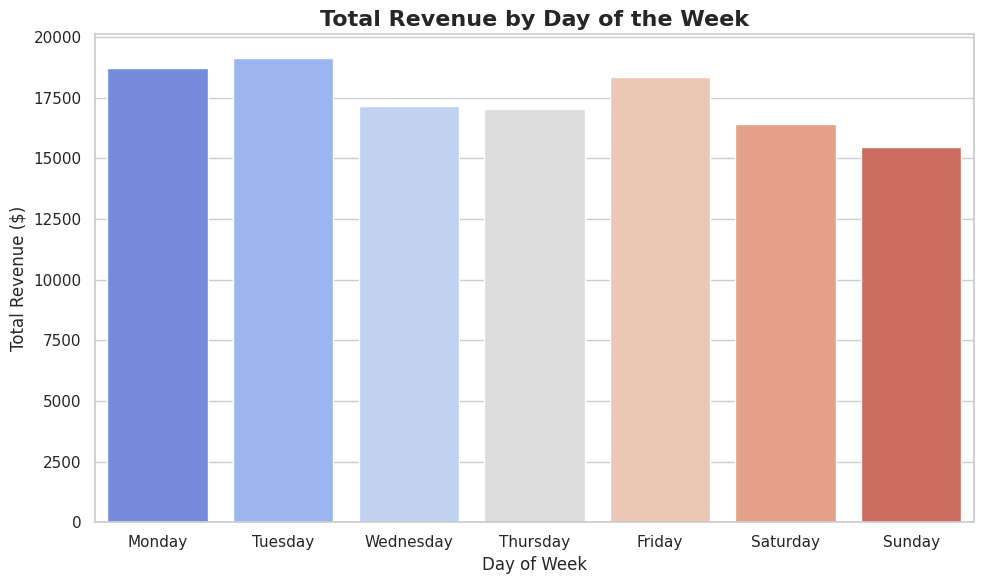

In [12]:
# Peak Sales Days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('day_of_week')['revenue'].sum().reindex(day_order).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_sales, x='day_of_week', y='revenue', palette='coolwarm')
plt.title('Total Revenue by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Simple Revenue Forecasting (Moving Average)

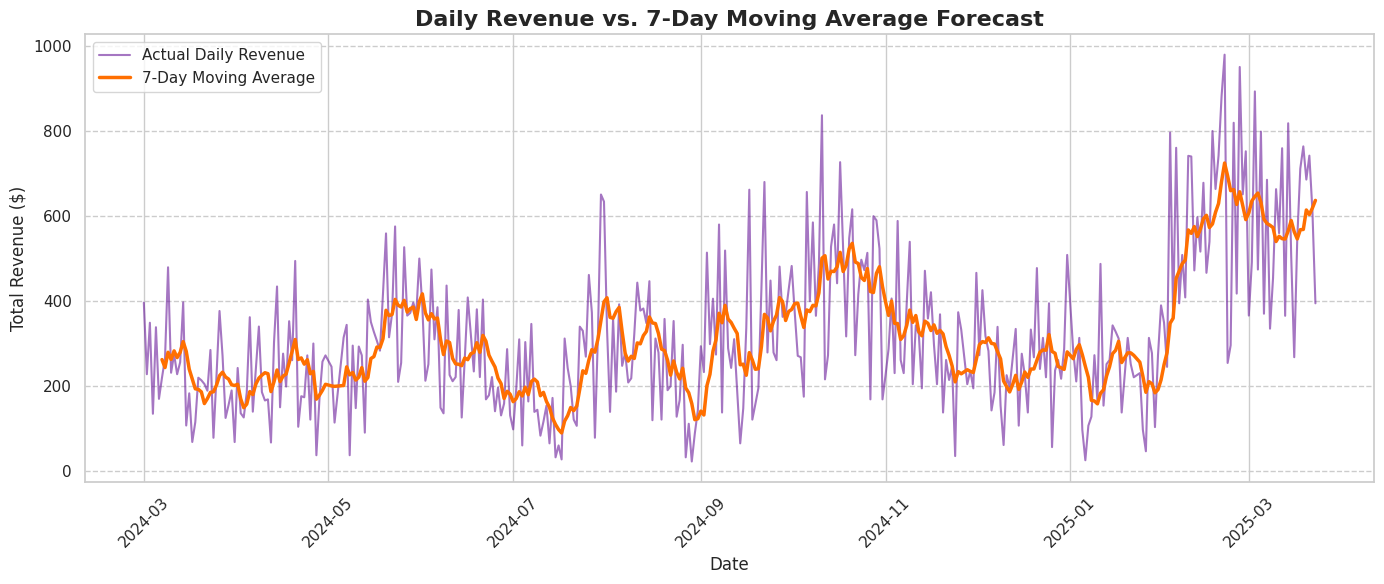

In [13]:
# A simple way to illustrate a baseline forecast is to use a rolling moving average on the daily revenue data.

# Set the window size (e.g., 7 days for a weekly smooth)
window_size = 7
daily_revenue['MA_7_Day'] = daily_revenue['revenue'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_revenue, x='date_only', y='revenue', label='Actual Daily Revenue', color='#6A1B9A', alpha=0.6)
sns.lineplot(data=daily_revenue, x='date_only', y='MA_7_Day', label=f'{window_size}-Day Moving Average', color='#FF6F00', linewidth=2.5)
plt.title(f'Daily Revenue vs. {window_size}-Day Moving Average Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Advance Analysis: Price and Profitability

Goals for Advanced Analysis (Price & Profitability)

1. Calculate Average Price per Product

2. Compare Volume vs. Value

3. Identify High-Leverage Products

* High-Volume, Low-Price Items: These are your staple items (like plain
coffee/Americano) that drive foot traffic.
* High-Price, High-Value Items: These are the items you should focus on upselling to maximize profit per customer (e.g., specialty lattes or signature drinks).

4. Visualize Pricing Tiers

# 1. Calculate Average Price per Product

In [23]:
# Calculate transaction count, total revenue, AND average price per product
product_profitability = df.groupby('product').agg(
    transaction_count=('product', 'size'),
    total_revenue=('revenue', 'sum'),
    average_price=('revenue', 'mean') # Goal 1: Calculate the average price
).reset_index()

# 2. Compare Volume vs. Average Price for Top 10

In [15]:
# Sort by Transaction Count (Volume) to look at the same top 10 items from EDA
top_10_profitability = product_profitability.sort_values(by='transaction_count', ascending=False).head(10)

print("\n--- TOP 10 PRODUCTS: VOLUME, REVENUE, AND AVERAGE PRICE ---")
# Reformat the average price and total revenue for cleaner display
top_10_profitability['average_price'] = top_10_profitability['average_price'].round(2)
top_10_profitability['total_revenue'] = top_10_profitability['total_revenue'].round(2)

print(top_10_profitability.to_markdown(index=False))


--- TOP 10 PRODUCTS: VOLUME, REVENUE, AND AVERAGE PRICE ---
| product                   |   transaction_count |   total_revenue |   average_price |
|:--------------------------|--------------------:|----------------:|----------------:|
| americano with milk       |                 866 |        26319.1  |           30.39 |
| latte                     |                 806 |        28658.3  |           35.56 |
| americano                 |                 593 |        15437.3  |           26.03 |
| cappuccino                |                 517 |        18514.1  |           35.81 |
| cortado                   |                 292 |         7534.86 |           25.8  |
| hot chocolate             |                 282 |        10172.5  |           36.07 |
| cocoa                     |                 243 |         8678.16 |           35.71 |
| espresso                  |                 152 |         3187.28 |           20.97 |
| irish whiskey             |                  21 |        

# 3. Visualize Average Price of Top Sellers (Goal 4)

/tmp/ipython-input-2567593951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


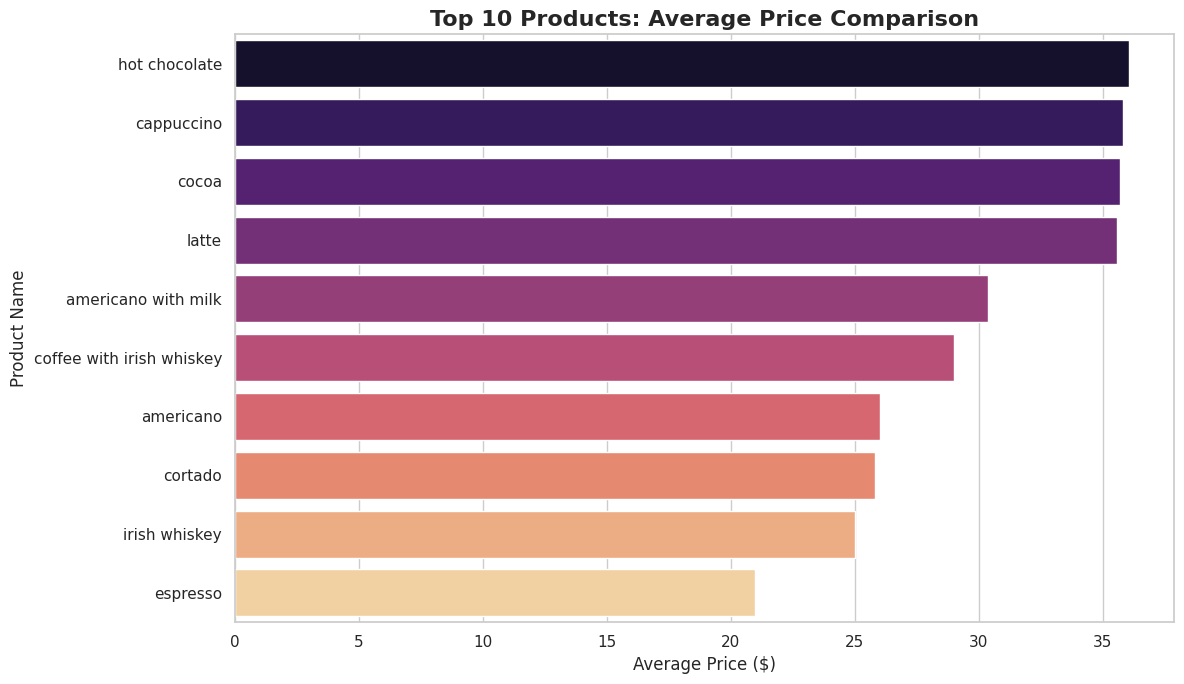

In [22]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_profitability.sort_values(by='average_price', ascending=False),
    x='average_price',
    y='product',
    palette='magma' # Use a distinct color palette for pricing
)
plt.title('Top 10 Products: Average Price Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()